Dataset: https://archive.ics.uci.edu/ml/datasets/abalone

<b>Data Set Information:</b>

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

<b>Attribute Information:</b>

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.<br>

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)<br>
Length / continuous / mm / Longest shell measurement<br>
Diameter / continuous / mm / perpendicular to length<br>
Height / continuous / mm / with meat in shell<br>
Whole weight / continuous / grams / whole abalone<br>
Shucked weight / continuous / grams / weight of meat<br>
Viscera weight / continuous / grams / gut weight (after bleeding)<br>
Shell weight / continuous / grams / after being dried<br>
Rings / integer / -- / +1.5 gives the age in years<br>

<b>Import necessary Libraries</b>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [83]:
# Importing data
a_data=pd.read_csv("abalone.data",header=None)
a_data.columns=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
a_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [84]:
a_data.shape

(4177, 9)

<b>Observation:</b>
There are 4177 rows and 9 columns.

In [13]:
a_data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


Last 5 rows of the dataset.

In [14]:
a_data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

<b> Observation:</b>
There are 9 columns in the dataset, ot of which 7 attributes are of float datatype, one attribute(Sex) are of object datatype and one attribute(Rings) are of int datatype.

<b>Check Missing Values</b>

In [17]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [18]:
a_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<b>Observation:</b>
There are no missing values in the dataset.

<b>Summary Statistics</b>

In [19]:
a_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<b>Observations:</b>
<li> Length varies from 0.075000 to 0.815000</li>
<li> Diameter varies from 0.055000 to 0.650000</li>

<b>Exploratory Data Analysis</b>

<b>Univariate Analysis</b>

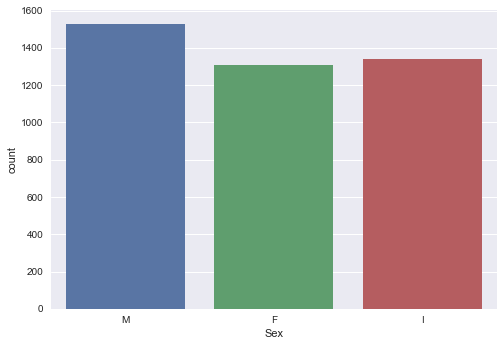

In [76]:
sns.countplot(x="Sex", data=a_data)

<b>Observation:</b>
There are three categories i.e.M, F, I. Out of which there are more Males.

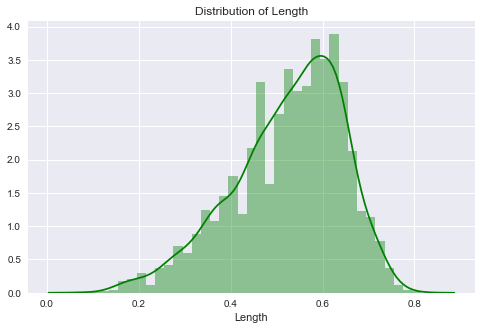

In [36]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,5))
plt.title("Distribution of Length")
a = sns.distplot(a_data["Length"], color = 'g')

<b>Observation:</b>
The average length is 0.6

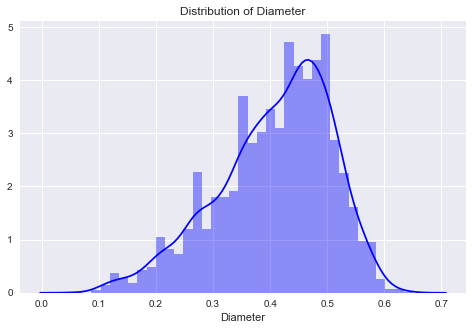

In [37]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Diameter")
b1 = sns.distplot(a_data["Diameter"], color = 'b')

<b>Observation:</b>
The average Diameter is 0.45.

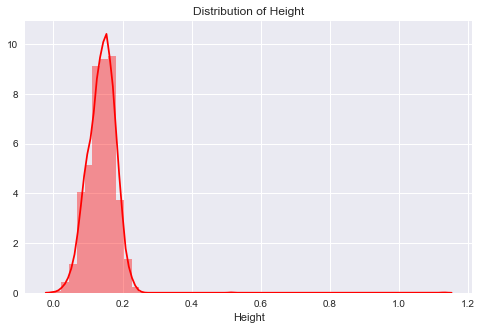

In [39]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Height")
c1 = sns.distplot(a_data["Height"], color = 'red')

<b>Observation:</b>
The average Height is 0.1

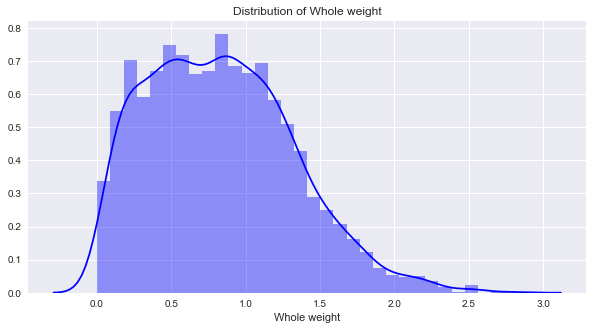

In [40]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Whole weight")
d1 = sns.distplot(a_data["Whole weight"], color = 'b')

<b>Observation:</b>
The avergae Whole weight is ~0.6

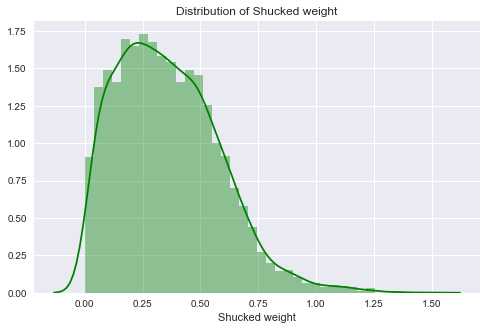

In [46]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Shucked weight")
e1 = sns.distplot(a_data["Shucked weight"], color = 'g')

<b>Observation:</b>
The average Shucked weight is 0.25

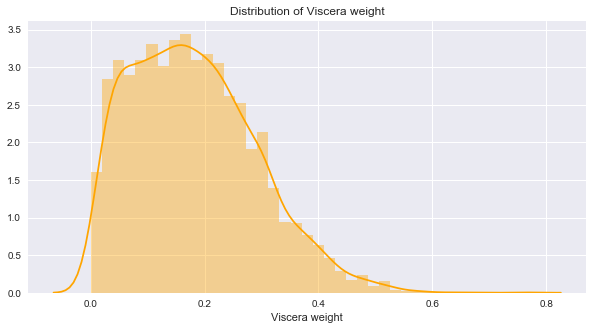

In [48]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Viscera weight")
f1 = sns.distplot(a_data["Viscera weight"], color = 'orange')

<b>Observation:</b>
THe average Viscera weight is 0.1

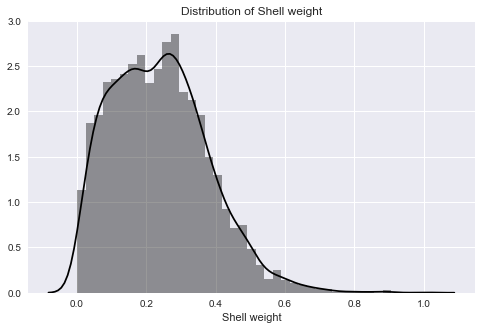

In [49]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Shell weight")
g1= sns.distplot(a_data["Shell weight"], color = 'black')

<b>Observation:</b>
The average Shell weight is ~0.3

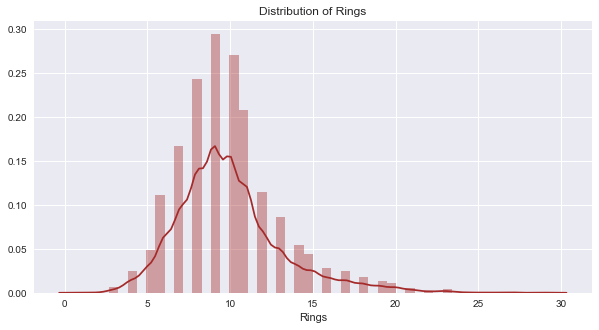

In [50]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Rings")
h1 = sns.distplot(a_data["Rings"], color = 'brown')

<b>Observation:</b>
The average of Rings is ~8.

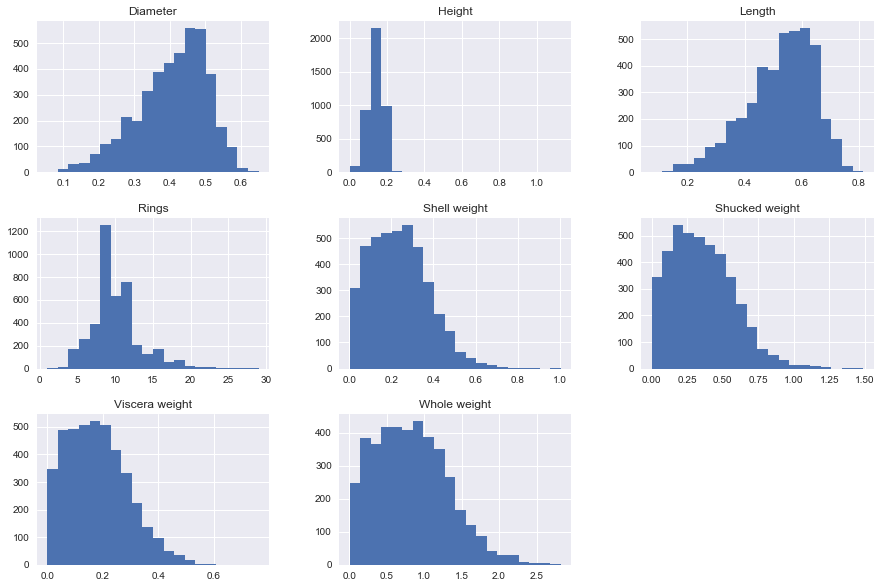

In [45]:
a_data.hist(figsize=(15,10),grid=True,bins=20);

<b>Bi-Variate Analysis</b>

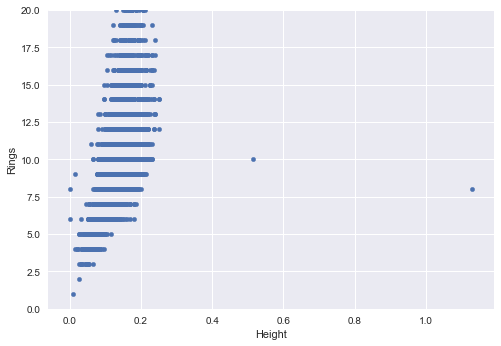

In [52]:
a_data.plot.scatter(x="Height",y="Rings",ylim=(0,20));

<b>Observation:</b>
From the above visualization, two values seems to be outlier.

<b>Multivariate Analysis</b>

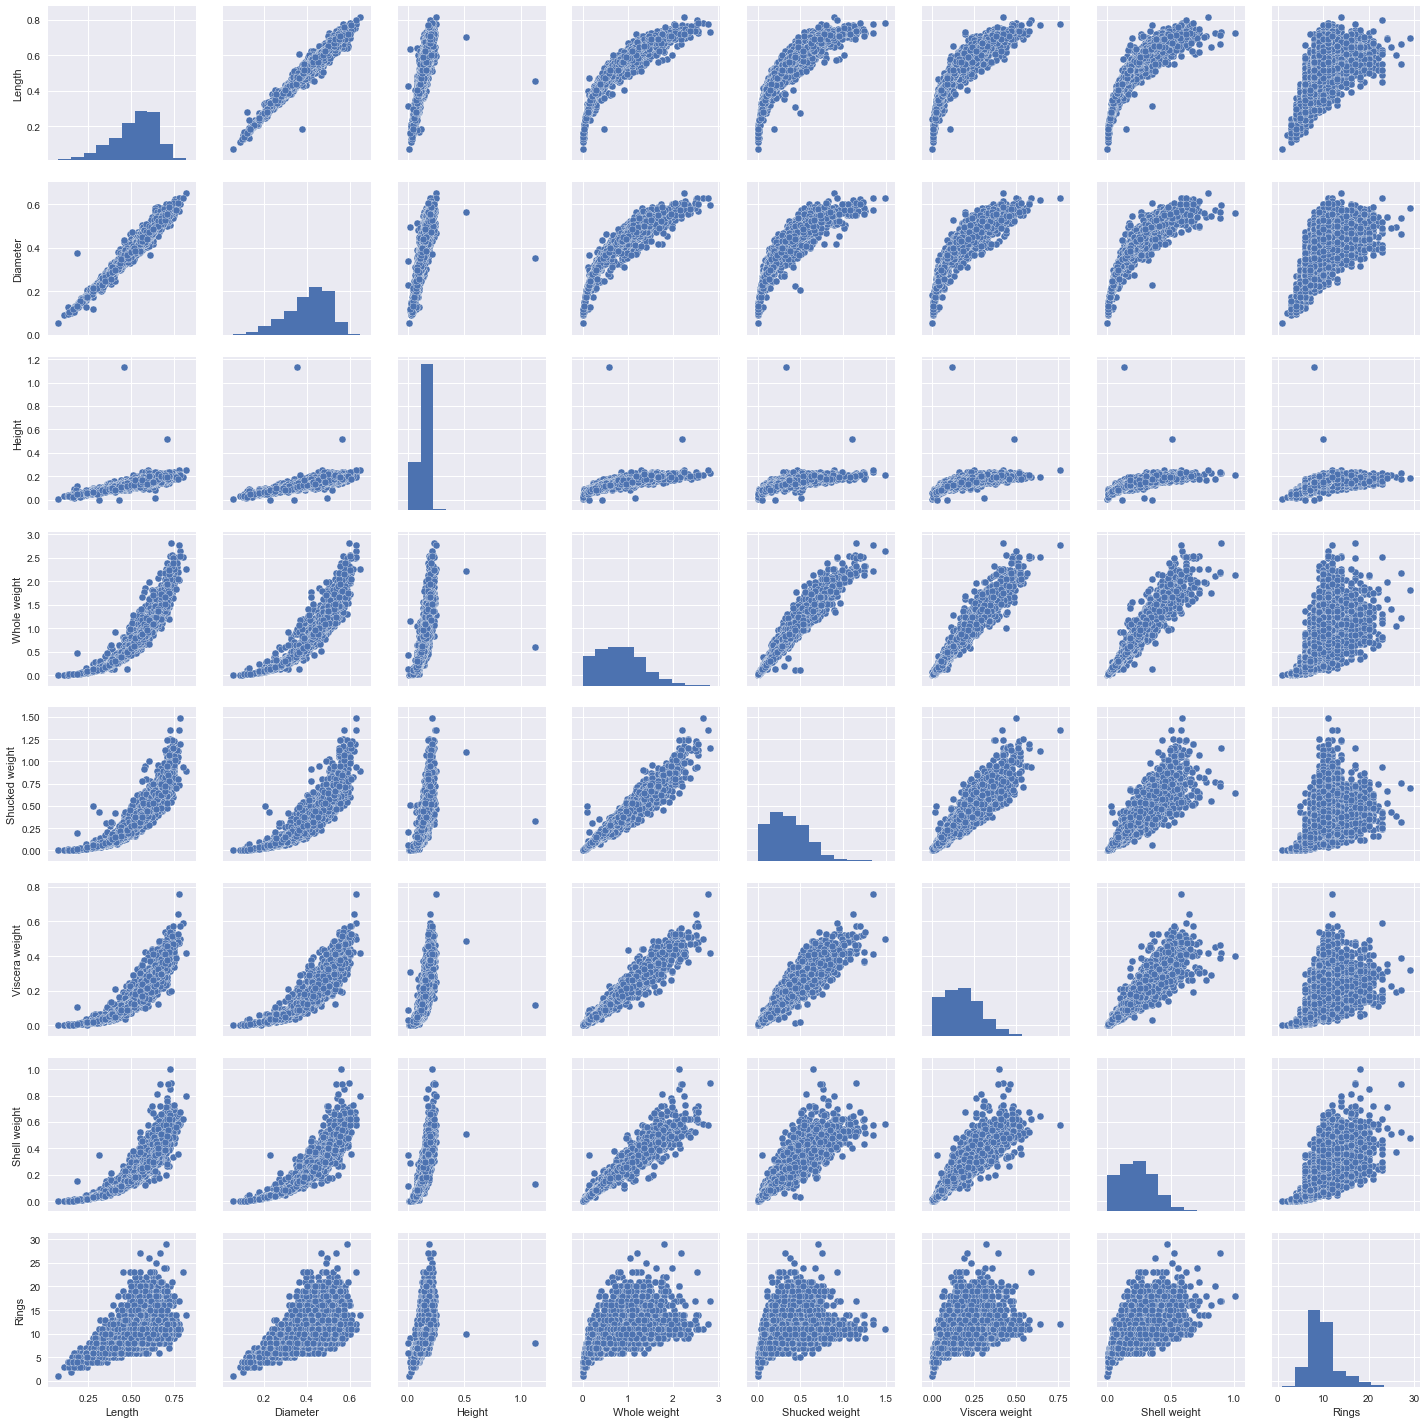

In [55]:
sns.pairplot(a_data)

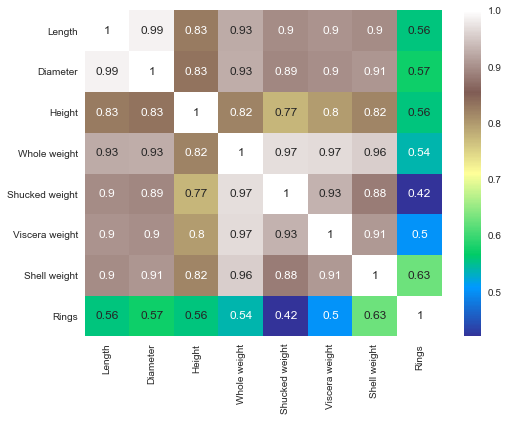

In [56]:
heatmap=a_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(heatmap, cmap="terrain",annot=True)

<b>Observation:</b>
<li> Diameter and Length are highly correlated. Similarly whole weight, Shucked weight, Shell weight are correlated.</li>
<li> There is multicollinearity in Shucked weight, Viscera weight with Whole weight.</li>

In [85]:
# As we have seen that attribute (Sex) is categorical, we need to Encode it
a_data=pd.get_dummies(a_data)

In [86]:
a_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


<b>Checking the Skewness</b>

In [87]:
a_data.skew(axis=0)

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

In [88]:
#Treating using log
for col in a_data.columns:
    if a_data.skew().loc[col]>0.55:
        a_data[col]=np.log1p(a_data[col])

In [89]:
a_data.skew(axis=0)

Length           -0.639873
Diameter         -0.609198
Height            1.099602
Whole weight      0.530959
Shucked weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
Rings            -0.061317
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

<b>Checking outliers</b>

In [91]:
from scipy.stats import zscore
z_score=abs(zscore(a_data))
print("The shape of dataset before removing outliers",a_data.shape)
a_data=a_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",a_data.shape)

The shape of dataset before removing outliers (4102, 11)
The shape of dataset after removing outliers (4071, 11)


<b>Splitting into input and output variables</b>

In [213]:
X= a_data.drop("Rings",axis=1)
y= a_data[["Rings"]]

<b>Standardization</b>

In [214]:
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b> Splitting the data into train and test into (70:30)</b>

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30,stratify=y)

In [216]:
# We are using R2 score to evaluate
from sklearn.metrics import r2_score
def max_r2score(model,X,y):
    max_r2score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        model.fit(X_train,y_train)
        y_pred= model.predict(X_test)
        score=r2_score(y_test,y_pred)
        if score>max_r2score:
            max_r2score=score
            final_r2_score=r_state
    print("Maximum R2_Score corresponding:",final_r2_score," and it is :",round((max_r2score),3))

# Machine Learning Models

As target variable is continous, We will implement Linear Regression, Decision tree Regressor, KNN Regressor, Random Forest Regressor and Gradient Boosting Regressor.

<b>Linear Regression</b>

In [217]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
max_r2score(LR,X,y)

Maximum R2_Score corresponding: 72  and it is : 0.6


In [218]:
pred_lr= LR.predict(X_test)
model_1= LR.score(X_test, y_test)
print("The accuracy of the Linear Regression Model is:",round((model_1),3))

The accuracy of the Linear Regression Model is: 0.599


In [219]:
# Cross validation score
from sklearn.model_selection import cross_val_score
lrc=cross_val_score(LR,X,y,cv=10,scoring="r2").mean()
lrc

0.47610777884246575

In [220]:
from sklearn import metrics
lr1=np.sqrt(metrics.mean_squared_error(y_test,pred_lr))
lr1

0.17065049578268968

<b> Decision Tree Regressor</b>

In [125]:
from sklearn.tree import DecisionTreeRegressor
det=DecisionTreeRegressor()
max_r2score(det,X,y)

Maximum R2_Score corresponding: 76  and it is : 0.285


In [126]:
pred_det= det.predict(X_test)
model_2= det.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((model_2),3))

The accuracy of the Decision Tree Model is: 0.788


In [154]:
# Cross validation score
dtc=cross_val_score(det,X,y,cv=10,scoring="r2").mean()
dtc

0.02481457507425062

In [127]:
from sklearn import metrics
det1=np.sqrt(metrics.mean_squared_error(y_test,pred_det))
det1

0.1239869827645242

<b> Random Forest Regressor</b>

In [174]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
parameters= {"n_estimators":[10,100,500,1000]}
rf=GridSearchCV(rf, parameters, cv=5)
rf.fit(X,y)
rf.best_params_

{'n_estimators': 500}

In [175]:
rf= RandomForestRegressor(n_estimators=500)
max_r2score(rf,X,y)

Maximum R2_Score corresponding: 80  and it is : 0.625


In [176]:
pred_rf= rf.predict(X_test)
model_3= rf.score(X_test, y_test)
print("The accuracy of the Random Forest Regressor Model is:",round((model_3),3))

The accuracy of the Random Forest Regressor Model is: 0.85


In [177]:
# Cross validation score
rfc=cross_val_score(rf,X,y,cv=10,scoring="r2").mean()
rfc

0.5120742037958756

In [178]:
from sklearn import metrics
rf1=np.sqrt(metrics.mean_squared_error(y_test,pred_rf))
rf1

0.10427198106586504

<b> KNN Regressor</b>

In [140]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
parameters={"n_neighbors":range(2,50)}
knn= GridSearchCV(knn,parameters,cv=10)
knn.fit(X,y)
knn.best_params_

{'n_neighbors': 19}

In [142]:
knn= KNeighborsRegressor(n_neighbors=19)
max_r2score(knn,X,y)

Maximum R2_Score corresponding: 72  and it is : 0.607


In [143]:
pred_knn= knn.predict(X_test)
model_4= knn.score(X_test, y_test)
print("The accuracy of the KNN Regressor Model is:",round((model_4),3))

The accuracy of the KNN Regressor Model is: 0.606


In [148]:
# Cross validation score
knc=cross_val_score(knn,X,y,cv=10,scoring="r2").mean()
knc

0.5051101150530135

In [144]:
from sklearn import metrics
knn1=np.sqrt(metrics.mean_squared_error(y_test,pred_knn))
knn1

0.16920905388693708

<b>XG Boost Regressor</b>

In [149]:
import xgboost as xgb
xg_reg= xgb.XGBRegressor(objective="reg:linear",silent=True)
max_r2score(xg_reg,X,y)

Maximum R2_Score corresponding: 70  and it is : 0.63


In [150]:
pred_xg= xg_reg.predict(X_test)
model_5= xg_reg.score(X_test, y_test)
print("The accuracy of the XG Boost Model is:",round((model_5),3))

The accuracy of the XG Boost Model is: 0.661


In [152]:
# Cross validation score
xgc=cross_val_score(xg_reg,X,y,cv=10,scoring="r2").mean()
xgc

0.5269568544648304

In [151]:
from sklearn import metrics
xg1=np.sqrt(metrics.mean_squared_error(y_test,pred_xg))
xg1

0.1568182804123098

<b>Gradient Boosting Regressor</b>

In [161]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.09, max_depth=5)
max_r2score(gb,X,y)

Maximum R2_Score corresponding: 72  and it is : 0.633


In [162]:
pred_gb= gb.predict(X_test)
model_6=gb.score(X_test, y_test)
print("The accuracy of the Gradient Boosting Regressor Model is:",round((model_6),3))

The accuracy of the Gradient Boosting Regressor Model is: 0.701


In [164]:
# Cross validation score
gbc=cross_val_score(gb,X,y,cv=10,scoring="r2").mean()
gbc

0.5296423526316287

In [163]:
gb_1=np.sqrt(metrics.mean_squared_error(y_test,pred_gb))
gb_1

0.1472729612342817

<b>Support Vector Machine</b>

In [237]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
max_r2score(svr,X,y)

Maximum R2_Score corresponding: 72  and it is : 0.598


In [239]:
pred_svr= svr.predict(X_test)
model_7=svr.score(X_test, y_test)
print("The accuracy of the Support Vector Regressor Model is:",round((model_7),3))

The accuracy of the Support Vector Regressor Model is: 0.599


In [240]:
# Cross validation score
svc=cross_val_score(svr,X,y,cv=10,scoring="r2").mean()
svc

0.4818590260363056

In [241]:
sv_1=np.sqrt(metrics.mean_squared_error(y_test,pred_svr))
sv_1

0.170645416303882

In [243]:
#Lets initialise the data frame with columns model and f1_score
data= [["Linear Regression", model_1, lr1],["Decision Tree Regressor", model_2,det1],["Random Forest", model_3, rf1],["KNN",model_4,knn1],["XG Boost", model_5,xg1],["Gradient Boosting",model_6,gb_1],["Support Vector Regressor", model_7,sv_1]]
compare_data= pd.DataFrame(data, columns=["Model Name", "Accuracy","RMSE"], index=[1,2,3,4,5,6,7])
compare_data

,Model Name,Accuracy,RMSE
1,Linear Regression,0.599089,0.170650
2,Decision Tree Regressor,0.788366,0.123987
3,Random Forest,0.850319,0.104272
4,KNN,0.605834,0.169209
5,XG Boost,0.661448,0.156818
6,Gradient Boosting,0.701408,0.147273
7,Support Vector Regressor,0.599113,0.170645


<b>Observation:</b>
<li> As the target variable is numerical, we have calculated R2 Score and evaluated RMSE for the performance of the model.</li>
<li> from the above results, we can see that Random Forest Regressor performed well and has lowest RMSE value(0.104272).</li>

<b>Saving the prediction</b>

As Random Forest Regressor performed well, we are saving prediction of this model.

In [247]:
np.savetxt('Model3.csv',pred_rf,delimiter=',')

In [248]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(rf, 'project3.pkl')

['project3.pkl']